In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns

sns.set()

In [12]:
path=r'D:\DataSets\365\TimeSeries\3\index2018.csv'
path='/'.join(str(path).split('\\'))
raw_data=pd.read_csv(path)
df=raw_data.copy()

In [13]:
del df['spx'],df['dax'],df['nikkei']

In [14]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)
df.set_index(keys='date',inplace=True)
df=df.asfreq('b')
df['ftse']=df.ftse.fillna(method='ffill')

In [15]:
size=int(len(df.ftse)*.8)
df_train,test=df.iloc[:size],df.iloc[size:]


In [16]:
def llr_test(simple,complicated,df=1):
    l1=simple.fit().llf
    l2=complicated.fit().llf
    lr=(2*(l2-l1)) # Why I use this here?
    p=chi2.sf(lr,df).round(3)
    return p

In [17]:
df_train['returns']=df_train.ftse.pct_change(periods=1).mul(100).round(2)


<ipython-input-17-75db8a448b30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['returns']=df_train.ftse.pct_change(periods=1).mul(100).round(2)


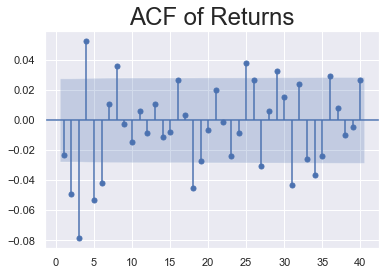

In [19]:
sgt.plot_acf(df_train.returns[1:],lags=40,zero=False)
plt.title('ACF of Returns',size=24);

In [21]:
model_ret_ma_1=ARMA(df_train.returns[1:],order=(0,1))
results_ret_ma_1=model_ret_ma_1.fit()
results_ret_ma_1.summary()

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.241
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sun, 11 Jul 2021   AIC                          15864.482
Time:                        10:43:14   BIC                          15884.045
Sample:                    01-10-1994   HQIC                         15871.337
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.165      0.244      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.721      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8397           +0.0000j           38.8397            0.0000
-----------------------------------------------------------------------------
"""

### Using higher Lags

In [24]:
model_ret_ma_2=ARMA(df_train.returns[1:],order=(0,2))
results_ret_ma_2=model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print('\nLLR Tests p-value:' +str(llr_test(model_ret_ma_1,model_ret_ma_2)))


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.503
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sun, 11 Jul 2021   AIC                          15853.006
Time:                        11:48:52   BIC                          15879.091
Sample:                    01-10-1994   HQIC                         15862.146
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.242      0.214      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.298      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

In [25]:
model_ret_ma_3=ARMA(df_train.returns[1:],order=(0,3))
results_ret_ma_3=model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print('\nLLR Tests p-value:' +str(llr_test(model_ret_ma_2,model_ret_ma_3)))

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7903.945
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sun, 11 Jul 2021   AIC                          15817.890
Time:                        11:49:24   BIC                          15850.496
Sample:                    01-10-1994   HQIC                         15829.316
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.378      0.168      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.424      0.154      -0.048       0.008
ma.L2.returns    -0.0557      0.013     

In [26]:
model_ret_ma_4=ARMA(df_train.returns[1:],order=(0,4))
results_ret_ma_4=model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print('\nLLR Tests p-value:' +str(llr_test(model_ret_ma_3,model_ret_ma_4)))

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.403
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sun, 11 Jul 2021   AIC                          15808.807
Time:                        11:50:02   BIC                          15847.934
Sample:                    01-10-1994   HQIC                         15822.517
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.308      0.191      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     

In [27]:
model_ret_ma_5=ARMA(df_train.returns[1:],order=(0,5))
results_ret_ma_5=model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print('\nLLR Tests p-value:' +str(llr_test(model_ret_ma_4,model_ret_ma_5)))

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.447
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 11 Jul 2021   AIC                          15798.894
Time:                        11:50:28   BIC                          15844.542
Sample:                    01-10-1994   HQIC                         15814.889
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.379      0.168      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.852      0.064      -0.054       0.002
ma.L2.returns    -0.0498      0.014     

In [28]:
model_ret_ma_6=ARMA(df_train.returns[1:],order=(0,6))
results_ret_ma_6=model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print('\nLLR Tests p-value:' +str(llr_test(model_ret_ma_5,model_ret_ma_6)))

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7888.835
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 11 Jul 2021   AIC                          15793.671
Time:                        11:50:56   BIC                          15845.840
Sample:                    01-10-1994   HQIC                         15811.952
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.433      0.152      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.092      -0.051       0.004
ma.L2.returns    -0.0486      0.014     

In [29]:
model_ret_ma_7=ARMA(df_train.returns[1:],order=(0,7))
results_ret_ma_7=model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print('\nLLR Tests p-value:' +str(llr_test(model_ret_ma_6,model_ret_ma_7)))

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7888.658
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 11 Jul 2021   AIC                          15795.316
Time:                        11:53:09   BIC                          15854.006
Sample:                    01-10-1994   HQIC                         15815.882
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.421      0.155      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.740      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     

In [30]:
model_ret_ma_8=ARMA(df_train.returns[1:],order=(0,8))
results_ret_ma_8=model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print('\nLLR Tests p-value:' +str(llr_test(model_ret_ma_7,model_ret_ma_8)))

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.229
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sun, 11 Jul 2021   AIC                          15790.457
Time:                        11:54:58   BIC                          15855.669
Sample:                    01-10-1994   HQIC                         15813.308
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.367      0.172      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.690      0.091      -0.051       0.004
ma.L2.returns    -0.0496      0.014     